In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
%matplotlib inline

In [2]:
crab = pd.read_csv("C:/Users/Philip/Schools/TAMU/STAT_659/homework/git_hw/agresti_crab.csv")

In [3]:
crab.head()

,color,spine,width,satell,weight,y,dark
0,2,3,28.3,8,3.05,1,1
1,3,3,22.5,0,1.55,0,1
2,1,1,26.0,9,2.30,1,1
3,3,3,24.8,0,2.10,0,1
4,3,3,26.0,4,2.60,1,1


In [6]:
crab.describe()

,color,spine,width,satell,weight,y,dark
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,2.439306,2.485549,26.298844,2.919075,2.437191,0.641618,0.872832
std,0.801933,0.825516,2.109061,3.148336,0.577025,0.480917,0.334128
min,1.000000,1.000000,21.000000,0.000000,1.200000,0.000000,0.000000
25%,2.000000,2.000000,24.900000,0.000000,2.000000,0.000000,1.000000
50%,2.000000,3.000000,26.100000,2.000000,2.350000,1.000000,1.000000
75%,3.000000,3.000000,27.700000,5.000000,2.850000,1.000000,1.000000
max,4.000000,3.000000,33.500000,15.000000,5.200000,1.000000,1.000000


In [35]:
target = pd.Series(crab['satell'])
dmat = crab.drop('satell', axis=1)
print(crab.shape)
print(target.shape)
print(dmat.shape)

(173, 7)
(173L,)
(173, 6)


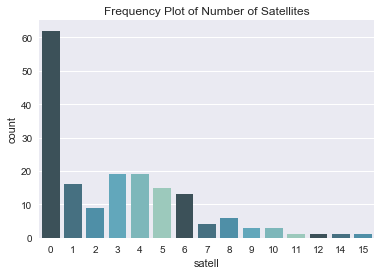

In [26]:
# let's first build a model to assess the impact of various features on the number of satellites, which is categorical
crab['satell'].value_counts()
sns.countplot(x=crab['satell'], palette=sns.color_palette("GnBu_d"))
plt.title("Frequency Plot of Number of Satellites")

In [64]:
pois_gam = pygam.PoissonGAM().fit(X=dmat, y=target)

In [49]:
def pdp_plotter(gam_obj, dset):
    """Function to construct all partial dependence plots for a particular graph
    
    Args:
        gam_obj: pygam model object of fixed or custom specification
        dset: sklearn bunch data set
    Returns:
        plots with number of features 
    """
    XX = pygam.utils.generate_X_grid(gam_obj)
    plt.rcParams['figure.figsize'] = (28, 8)
    fig, axs = plt.subplots(1, len(dset.feature_names[0:6]))
    titles = dset.feature_names
    for i, ax in enumerate(axs):
        pdep, confi = gam_obj.partial_dependence(XX, feature=i+1, width=.95)
        ax.plot(XX[:, i], pdep)
        ax.plot(XX[:, i], confi[0][:,0], c='grey', ls='--')
        ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
        ax.set_title(titles[i])    

Help on class PoissonGAM in module pygam.pygam:

class PoissonGAM(GAM)
 |  Poisson GAM
 |  
 |  Parameters
 |  ----------
 |  callbacks : list of strings or list of CallBack objects,
 |              default: ['deviance', 'diffs']
 |      Names of callback objects to call during the optimization loop.
 |  
 |  constraints : str or callable, or iterable of str or callable,
 |                default: None
 |      Names of constraint functions to call during the optimization loop.
 |  
 |      Must be in {'convex', 'concave', 'monotonic_inc', 'monotonic_dec',
 |                  'circular', 'none'}
 |  
 |      If None, then the model will apply no constraints.
 |  
 |      If only one str or callable is specified, then is it copied for all
 |      features.
 |  
 |  dtype : str in {'auto', 'numerical',  'categorical'},
 |          or list of str, default: 'auto'
 |      String describing the data-type of each feature.
 |  
 |      'numerical' is used for continuous-valued data-types,
 |  

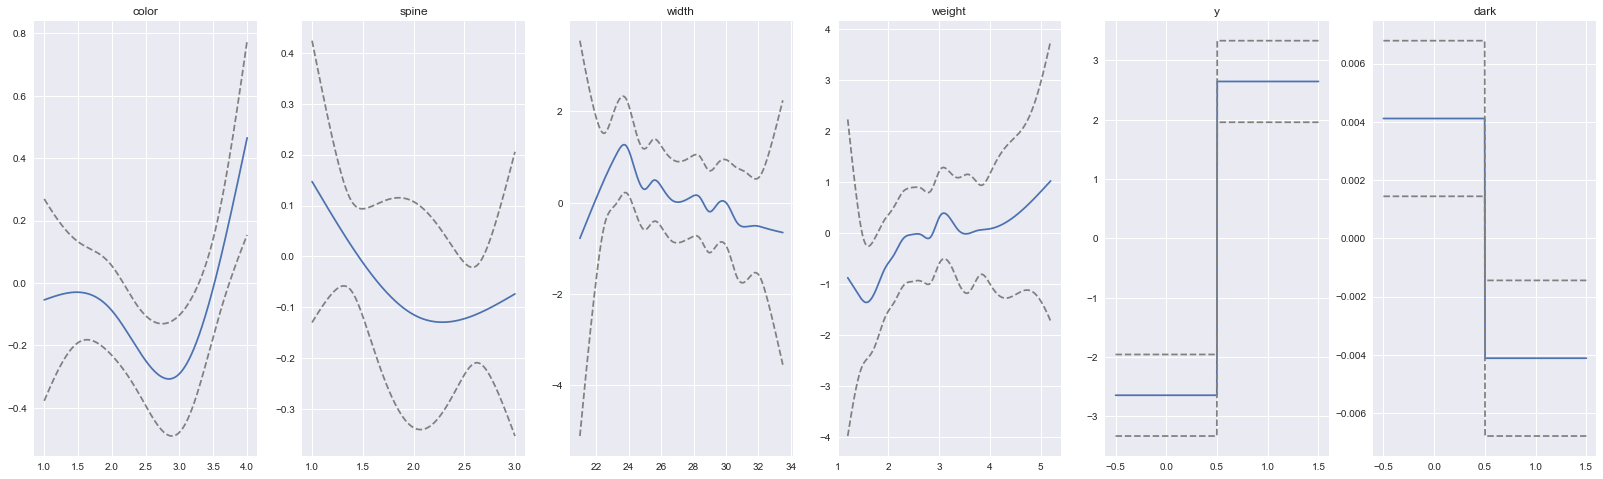

In [74]:
gam_obj = pois_gam
dset = dmat
XX = pygam.utils.generate_X_grid(gam_obj)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(dset.columns))
titles = dset.columns

for i, ax in enumerate(axs):
    pdep, confi = gam_obj.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:,0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i])  

In [73]:
dmat.columns

Index([u'color', u'spine', u'width', u'weight', u'y', u'dark'], dtype='object')